# Irvine Property Value Analysis


## Introduction

Analyzing property values centered around the city of Irvine, which is roughly in the center of Orange County. Sale prices for properties in Irvine and its surrounding cities were aggregated from Redfin. Along with the sales price, Redfin also provides a few categories of information on the listed property such as the number of bedrooms, the size of the house, etc. The data even includes the coordinates of the properties themselves, which will prove to be very useful when it comes to creating/engineering geospatial features that may be informative for our models.

## Loading the Data

We first load up the data to see what we have. Redfin only allows you to download 350 listings at a time, so it was necessary to perform multiple queries and download our data in batches. This isn't much of a problem, as we can simply merge all of the separate datasets together into one dataframe with pandas.

In [38]:
import pandas as pd

In [39]:
import_list = ["./data/redfin_2020-06-02-21-35-57.csv",
               "./data/redfin_2020-06-02-21-39-32.csv",
               "./data/redfin_2020-06-02-21-36-40.csv",  
               "./data/redfin_2020-06-02-21-41-03.csv",
               "./data/redfin_2020-06-02-21-36-56.csv",  
               "./data/redfin_2020-06-02-21-42-14.csv",
               "./data/redfin_2020-06-02-21-37-22.csv",  
               "./data/redfin_2020-06-02-21-42-54.csv",
               "./data/redfin_2020-06-02-21-38-05.csv"]

In [40]:
df_property = pd.read_csv("./data/redfin_2020-06-02-21-39-04.csv")

for i in range(len(import_list)):
    df_property = df_property.append(pd.read_csv(import_list[i]))

In [42]:
df_property.drop_duplicates(inplace = True)
df_property.shape

(1923, 27)

In [43]:
df_property.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,976 Bayside #607,Newport Beach,CA,92660.0,1250000,2.0,2.25,...,Active,NaN,NaN,http://www.redfin.com/CA/Newport-Beach/976-Bay...,CRMLS,OC20057627,N,Y,33.610144,-117.891517
1,MLS Listing,NaN,Single Family Residential,20062 Bayview Ave,Newport Beach,CA,92660.0,1525000,3.0,3.00,...,Active,NaN,NaN,http://www.redfin.com/CA/Newport-Beach/20062-B...,CRMLS,OC20091116,N,Y,33.656655,-117.869718
2,MLS Listing,NaN,Single Family Residential,619 Irvine Ave,Newport Beach,CA,92663.0,1450000,3.0,2.00,...,Active,NaN,NaN,http://www.redfin.com/CA/Newport-Beach/619-Irv...,CRMLS,OC20067170,N,Y,33.623624,-117.913813
3,MLS Listing,NaN,Single Family Residential,1830 Port Westbourne Pl,Newport Beach,CA,92660.0,2275000,4.0,2.50,...,Active,NaN,NaN,http://www.redfin.com/CA/Newport-Beach/1830-Po...,CRMLS,NP20104838,N,Y,33.624301,-117.857494
4,MLS Listing,NaN,Mobile/Manufactured Home,30 Saratoga #30,Newport Beach,CA,92660.0,425000,3.0,2.00,...,Active,NaN,NaN,http://www.redfin.com/CA/Newport-Beach/30-Sara...,CRMLS,NP20104179,N,Y,33.618048,-117.901300


In [44]:
df_property.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [45]:
keep_cols = ['PRICE', 
             'PROPERTY TYPE', 
             'CITY', 
             'ZIP OR POSTAL CODE', 
             'BEDS', 
             'BATHS',
             'SQUARE FEET',
             'LATITUDE',
             'LONGITUDE']

df_property = df_property[keep_cols]

In [46]:
df_property.dtypes

PRICE                   int64
PROPERTY TYPE          object
CITY                   object
ZIP OR POSTAL CODE    float64
BEDS                  float64
BATHS                 float64
SQUARE FEET           float64
LATITUDE              float64
LONGITUDE             float64
dtype: object

In [47]:
df_property['ZIP OR POSTAL CODE'] = df_property['ZIP OR POSTAL CODE'].astype('str')
df_property['ZIP OR POSTAL CODE'] = df_property['ZIP OR POSTAL CODE'].str.replace(r'\.0', '')

df_property['ZIP OR POSTAL CODE']

0     92660
1     92660
2     92663
3     92660
4     92660
      ...  
93    92780
94    92780
95    92780
96    92780
97    92780
Name: ZIP OR POSTAL CODE, Length: 1923, dtype: object

<br>

You can immediately notice from our quick peek at the dataset that there are _NaN_ values. This is to be expected, and probabaly one of the first things to check for, as missing values may wreak havoc on future analysis and modeling efforts. To inspect deeper, it is informative to see how many _NaN_ values exist in each column individually:

In [48]:
df_property.isna().sum()

PRICE                  0
PROPERTY TYPE          0
CITY                   0
ZIP OR POSTAL CODE     0
BEDS                  13
BATHS                 13
SQUARE FEET           29
LATITUDE               0
LONGITUDE              0
dtype: int64

<br>

So we do see that some columns have many missing values, while other columns land in single digit values. Fortunately, all of the columns I planned on using fall in the latter column.

In [49]:
# We have some vacant lots listed for sale. We will remove these, as it does not fit what
# we are trying to do with predicting property values. Additionally, these listings would
# be removed because they have no beds or baths anyways

df_property['PROPERTY TYPE'].value_counts()

Single Family Residential    1154
Condo/Co-op                   466
Townhouse                     129
Mobile/Manufactured Home      100
Multi-Family (2-4 Unit)        48
Vacant Land                    13
Multi-Family (5+ Unit)         13
Name: PROPERTY TYPE, dtype: int64

In [50]:
# Remove all listings of vacant plots

df_property = df_property.loc[df_property['PROPERTY TYPE'] != 'Vacant Land', ]

In [54]:
df_property.isna().sum()

PRICE                  0
PROPERTY TYPE          0
CITY                   0
ZIP OR POSTAL CODE     0
BEDS                   0
BATHS                  0
SQUARE FEET           16
LATITUDE               0
LONGITUDE              0
dtype: int64

In [55]:
df_property.dropna(inplace = True)

<br>

## Data Enrichment and Feature Engineering

So back to the idea of using the supplied coordinates to derive additional geospatial features that may be useful, 

In [58]:
from geopy import distance

In [59]:
# Use the .apply() method to apply a transformation on each row. Particularly, we
# are calculating the distance to Pershing Square for each row and returning the 
# value in kilometers
newport_coord = (33.605587, -117.919656)

df_property['NPBeach_Dist'] = df_property.apply(lambda row: distance.distance((row['LATITUDE'], row['LONGITUDE']), newport_coord).km, axis = 1)

In [60]:
df_property['NPBeach_Dist']

0      2.659922
1      7.317857
2      2.072827
3      6.130677
4      2.193677
        ...    
93    17.178001
94    17.178001
95    17.178001
96    17.178001
97    17.178001
Name: NPBeach_Dist, Length: 1894, dtype: float64

In [61]:
uci_coords = (33.645807, -117.842733)

df_property['UCI_Dist'] = df_property.apply(lambda row: distance.distance((row['LATITUDE'], row['LONGITUDE']), uci_coords).km, axis = 1)

In [62]:
df_property['UCI_Dist']

0      6.011317
1      2.777325
2      7.038663
3      2.750520
4      6.245552
        ...    
93    10.517346
94    10.517346
95    10.517346
96    10.517346
97    10.517346
Name: UCI_Dist, Length: 1894, dtype: float64

In [64]:
df_property.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True)

In [65]:
df_property.head()

,PRICE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,NPBeach_Dist,UCI_Dist
0,1250000,Condo/Co-op,Newport Beach,92660,2.0,2.25,1538.0,2.659922,6.011317
1,1525000,Single Family Residential,Newport Beach,92660,3.0,3.00,2106.0,7.317857,2.777325
2,1450000,Single Family Residential,Newport Beach,92663,3.0,2.00,1500.0,2.072827,7.038663
3,2275000,Single Family Residential,Newport Beach,92660,4.0,2.50,2407.0,6.130677,2.750520
4,425000,Mobile/Manufactured Home,Newport Beach,92660,3.0,2.00,1150.0,2.193677,6.245552


<br>

Reduce the number of cities. We bin them into distinct geographical regions

In [66]:
# Too many cities to use both cities and zip codes (as this would create too many dummy
# variables. I will proceed by binning the cities into four distinct regions)

df_property['CITY'].unique()

array(['Newport Beach', 'Costa Mesa', 'Corona del Mar', 'Irvine',
       'Lake Forest', 'Newport Coast', 'Laguna Hills', 'Corona Del Mar',
       'Tustin', 'Santa Ana', 'North Tustin', 'Garden Grove',
       'Fountain Valley', 'Orange', 'Trabuco Canyon', 'TUSTIN'],
      dtype=object)

In [67]:
def city_bins(row):
    if row['CITY'] in ['Irvine']:
        return 'Irvine'
    elif row['CITY'] in ['Fountain Valley', 'Costa Mesa', 'Santa Ana', 'Garden Grove']:
        return 'W'
    elif row['CITY'] in ['Orange', 'Tustin', 'TUSTIN', 'North Tustin']:
        return 'N'
    elif row['CITY'] in ['Lake Forest', 'Laguna Hills', 'Trabuco Canyon']:
        return 'E'
    else:
        return 'Beach'

In [68]:
df_property['Region'] = df_property.apply(lambda row: city_bins(row), axis = 1)

In [69]:
df_property['Region'].value_counts()

Irvine    687
Beach     500
W         336
E         220
N         151
Name: Region, dtype: int64

In [70]:
df_property.drop(columns = ['CITY'], inplace = True)

<br>

Our model is now ready for some EDA before modeling

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

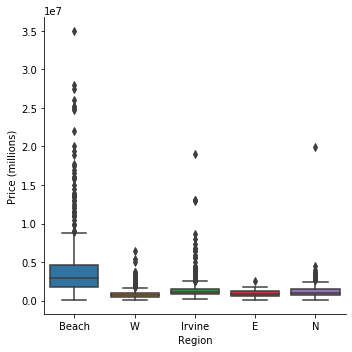

In [85]:
ax = sns.catplot(y = 'PRICE', x = 'Region', kind = 'box', data = df_property)
ax.set(ylabel = 'Price (millions)');

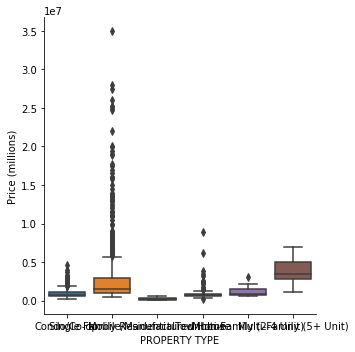

In [90]:
ax = sns.catplot(y = 'PRICE', x = 'PROPERTY TYPE', kind = 'box', data = df_property)
ax.set(ylabel = 'Price (millions)');

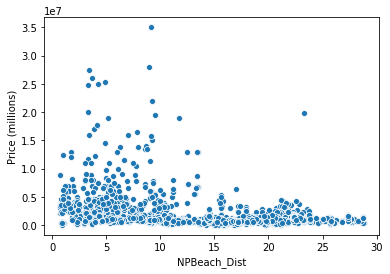

In [88]:
ax = sns.scatterplot(y = 'PRICE', x = 'NPBeach_Dist', data = df_property)
ax.set(ylabel = 'Price (millions)');

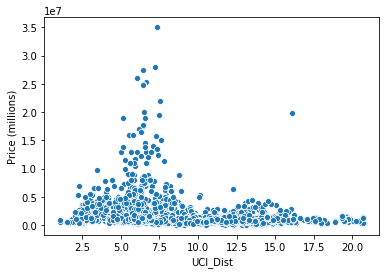

In [89]:
ax = sns.scatterplot(y = 'PRICE', x = 'UCI_Dist', data = df_property)
ax.set(ylabel = 'Price (millions)');